In [24]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry
import plotly.graph_objects as go
import plotly.express as px
from pandas.plotting import parallel_coordinates

In [25]:
all_data = pd.read_csv('./data/fifa/all_players.csv')
all_data.drop(['Unnamed: 0', 'Height', 'Weight', 'Alternative positions', 'play style', 'url', 'GK Diving',	'GK Handling',	'GK Kicking',	'GK Positioning',	'GK Reflexes'], axis = 1, inplace= True)

all_data

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_73059/1346339099.py:1: DtypeWarning:

Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.



,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,...,Strength,Aggression,Position,Weak foot,Skill moves,Preferred foot,Age,Nation,League,Team
0,1,Kylian Mbappé,91,97,90,80,92,36,78,97,...,77,64,ST,4,5,Right,25,France,LALIGA EA SPORTS,Real Madrid
1,2,Rodri,91,66,80,86,84,87,85,65,...,83,85,CDM,4,3,Right,28,Spain,Premier League,Manchester City
2,4,Erling Haaland,91,88,92,70,81,45,88,80,...,93,88,ST,3,3,Left,24,Norway,Premier League,Manchester City
3,5,Jude Bellingham,90,80,87,83,88,78,83,81,...,77,85,CAM,4,4,Right,21,England,LALIGA EA SPORTS,Real Madrid
4,7,Vini Jr.,90,95,84,81,91,29,69,95,...,65,58,LW,4,5,Right,24,Brazil,LALIGA EA SPORTS,Real Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17732,17146,Araya Dennis,53,42,57,49,52,25,42,44,...,38,35,ST,3,2,Right,18,England,Barclays WSL,Spurs
17733,17146,Alexia Férnandez,53,53,55,51,53,34,47,52,...,54,41,LW,3,2,Right,22,Spain,Liga F,Granada CF
17734,17146,Aleigh Gambone,53,60,58,53,56,49,53,58,...,51,51,CM,4,4,Right,23,United States,Scottish Women's League,Glasgow City FC
17735,17146,Joy Lysser,53,61,52,48,56,53,58,60,...,60,50,CM,3,2,Left,20,Switzerland,Schweizer Damen Liga,FC Zürich


In [26]:
st_stats = ['OVR', 'PAC', 'SHO', 'Positioning', 'Finishing', 'Shot Power', 'Long Shots', 'Volleys']
st_data = all_data[all_data['Position'] == 'ST']
st_data = st_data.sort_values('OVR', ascending=False)[:30]
st_data.reset_index(inplace=True)
st_data.drop(columns='index', axis=1, inplace=True)
st_data.head()

,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,...,Strength,Aggression,Position,Weak foot,Skill moves,Preferred foot,Age,Nation,League,Team
0,1,Kylian Mbappé,91,97,90,80,92,36,78,97,...,77,64,ST,4,5,Right,25,France,LALIGA EA SPORTS,Real Madrid
1,4,Erling Haaland,91,88,92,70,81,45,88,80,...,93,88,ST,3,3,Left,24,Norway,Premier League,Manchester City
2,10,Sam Kerr,90,85,88,74,90,42,83,86,...,86,70,ST,4,4,Right,31,Australia,Barclays WSL,Chelsea
3,11,Harry Kane,90,65,93,84,83,49,82,64,...,86,80,ST,4,3,Right,31,England,Bundesliga,FC Bayern München
4,17,Ada Hegerberg,89,74,89,77,86,39,79,73,...,85,65,ST,4,4,Right,29,Norway,Arkema PL,OL


In [27]:
fig = go.Figure()

for player in st_data['Name']:
    player_data = st_data[st_data['Name'] == player][st_stats].values.flatten()
    fig.add_trace(
        go.Bar(
            x=st_stats,
            y=player_data,
            name=player,
            visible=False
        )
    )

fig.data[0].visible = True

fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    args=[{"visible": [i == j for i in range(len(st_data['Name']))]}],  
                    label=player,
                    method='update'
                )
                for j, player in enumerate(st_data['Name'])  
            ],
            direction='down',
            showactive=True,
        )
    ]
)

fig.update_layout(
    title='Best 30 ST',
    xaxis_title='Attributes',
    yaxis_title='Value',
    showlegend=False
)

fig.show()

In [28]:
for stat in st_stats:
    print(f'Name {st_data.Name[st_data[stat].idxmax()]}, index: {st_data[stat].idxmax()}, best atribute is: {stat} and its value is: {st_data[stat].iloc[st_data[stat].idxmax()]}')

Name Kylian Mbappé, index: 0, best atribute is: OVR and its value is: 91
Name Kylian Mbappé, index: 0, best atribute is: PAC and its value is: 97
Name Harry Kane, index: 3, best atribute is: SHO and its value is: 93
Name Erling Haaland, index: 1, best atribute is: Positioning and its value is: 96
Name Erling Haaland, index: 1, best atribute is: Finishing and its value is: 96
Name Erling Haaland, index: 1, best atribute is: Shot Power and its value is: 94
Name Harry Kane, index: 3, best atribute is: Long Shots and its value is: 89
Name Sam Kerr, index: 2, best atribute is: Volleys and its value is: 92


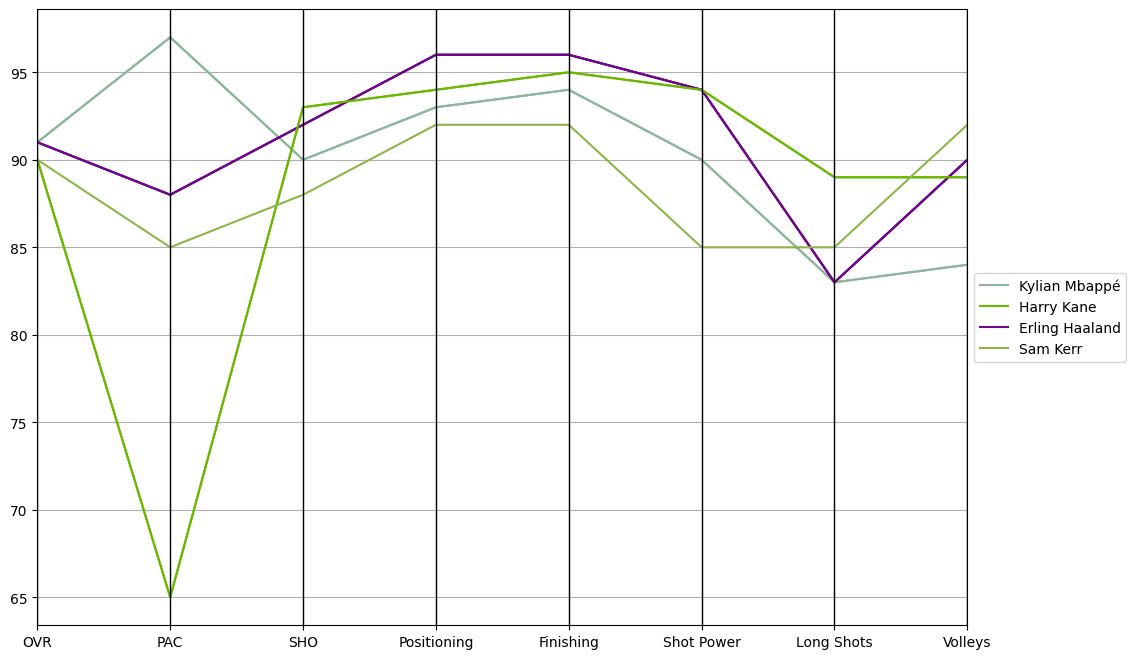

In [29]:
best_st = st_data.loc[st_data[st_stats].idxmax()]

plt.figure(figsize=(12,8))
parallel_coordinates(best_st, class_column='Name', cols=st_stats)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

1) Haaland
2) Harry Kane/Kylian Mbappé